<h1>Assignment for ggplot2</h1>
<p>For this optional assignment we will be recreating this plot from The Economist:</p>

 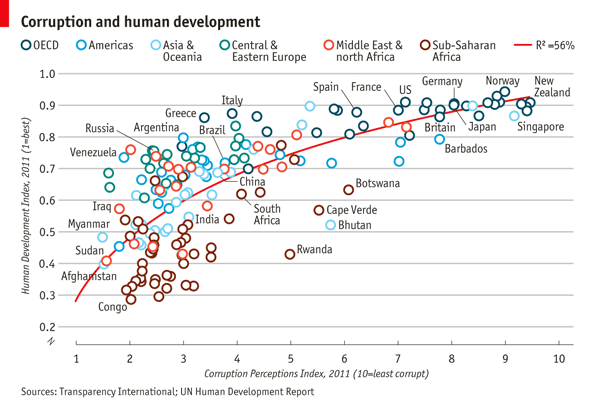

<h2>Let's get started!</h2>

<p>Import the ggplot2 data.table libraries and use fread to load the csv file 'Economist_Assignment_Data.csv' into a dataframe called df (Hint: use drop=1 to skip the first column)</p>

In [1]:
install.packages('ggplot2')
install.packages('ggthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(ggthemes)

Import csv file.

In [6]:
df <- read.csv("/content/Economist_Assignment_Data.csv")

In [7]:
head(df)

,X,Country,HDI.Rank,HDI,CPI,Region
,<int>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,1,Afghanistan,172,0.398,1.5,Asia Pacific
2,2,Albania,70,0.739,3.1,East EU Cemt Asia
3,3,Algeria,96,0.698,2.9,MENA
4,4,Angola,148,0.486,2.0,SSA
5,5,Argentina,45,0.797,3.0,Americas
6,6,Armenia,86,0.716,2.6,East EU Cemt Asia


Create a scatterplot showing X as CPI, Y as HDI and Region as color.

In [17]:
pl1 <- ggplot(df, aes(x=CPI, y=HDI))
pl <- pl1 + geom_point(aes(color=factor(Region)))

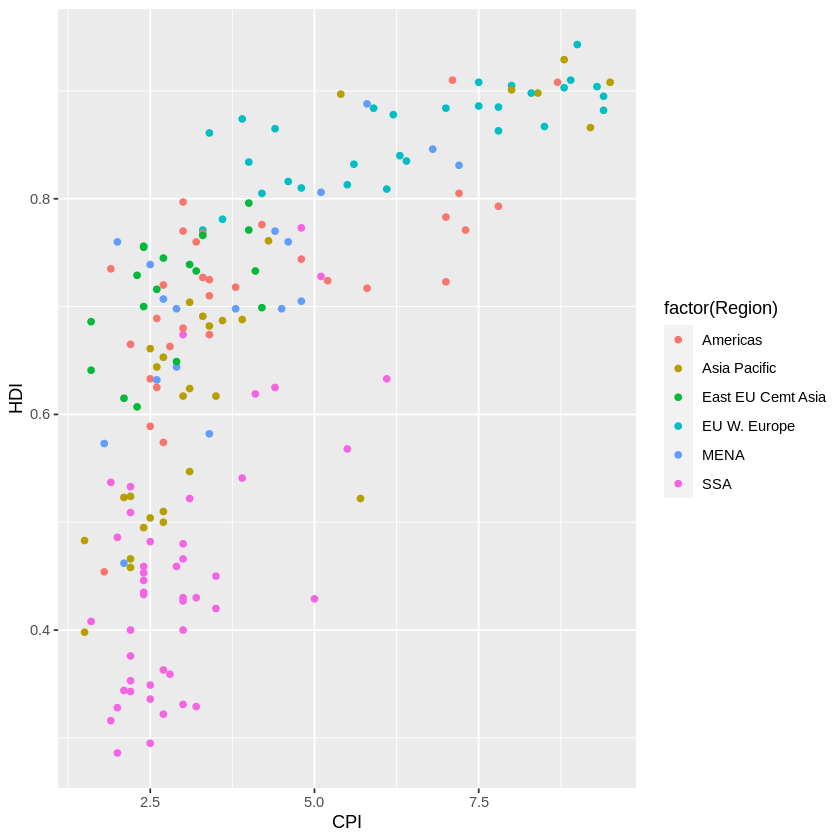

In [18]:
print(pl)

Change the points to be larger empty circles.

In [48]:
pl1 <- ggplot(df, aes(x=CPI, y=HDI, color = factor(Region),size = 5))
pl2 <- pl1 + geom_point(aes(shape=1)) + scale_shape_identity()
#pl3 <- pl2 + geom_point(aes(shape = 1,size = 5))

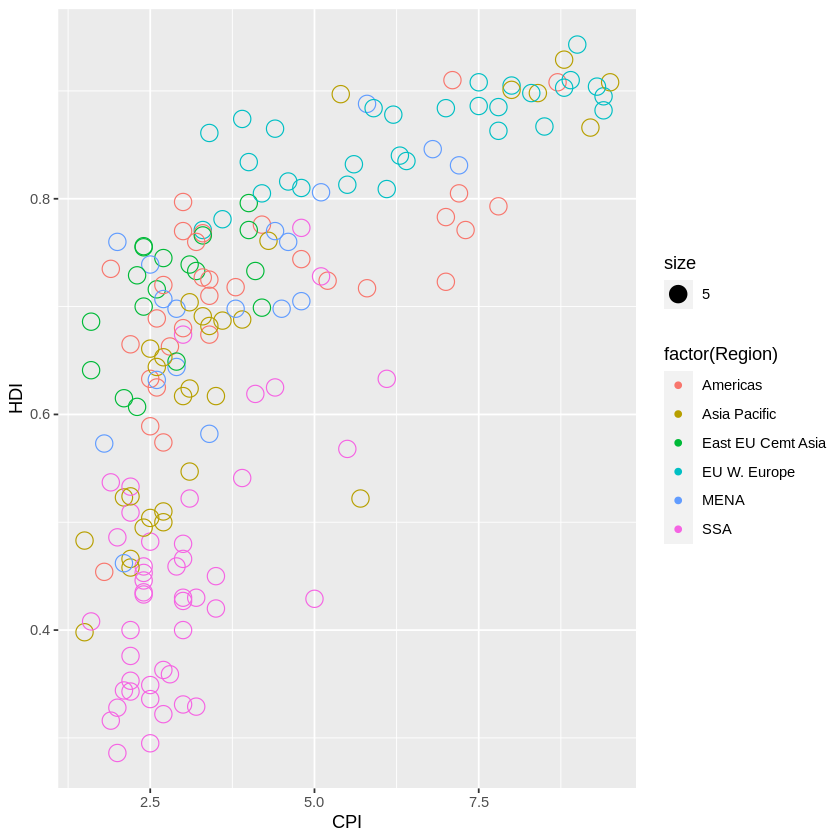

In [49]:
print(pl2)

Add trend line.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“The following aesthetics were dropped during statistical transformation: colour
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


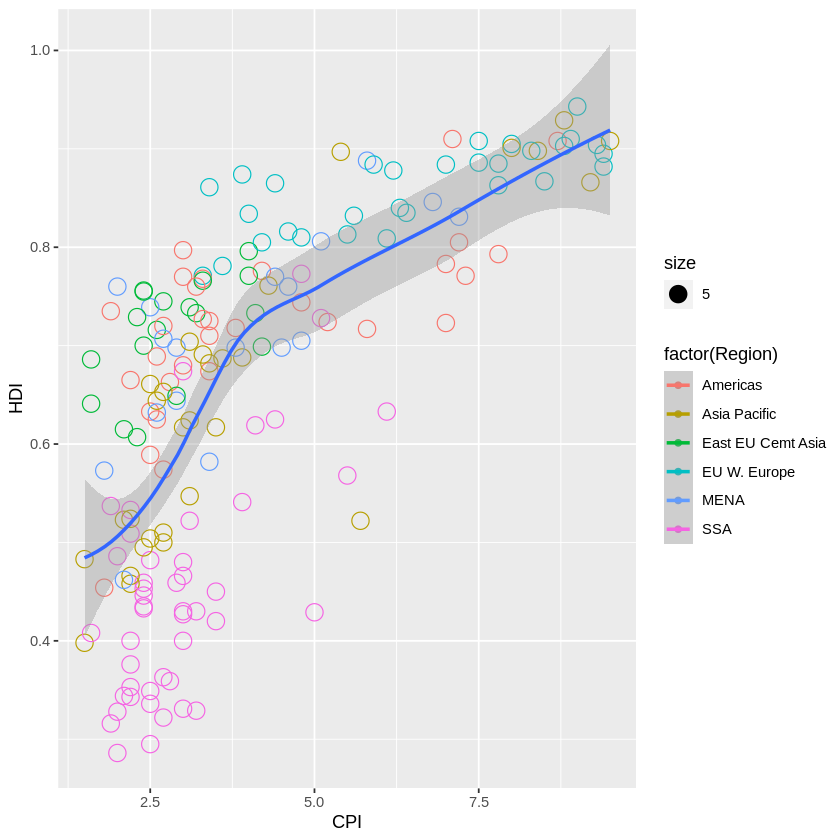

In [39]:
pl3 <- pl2 +geom_smooth(aes(group=1))
print(pl3)

Edit the trend line further.

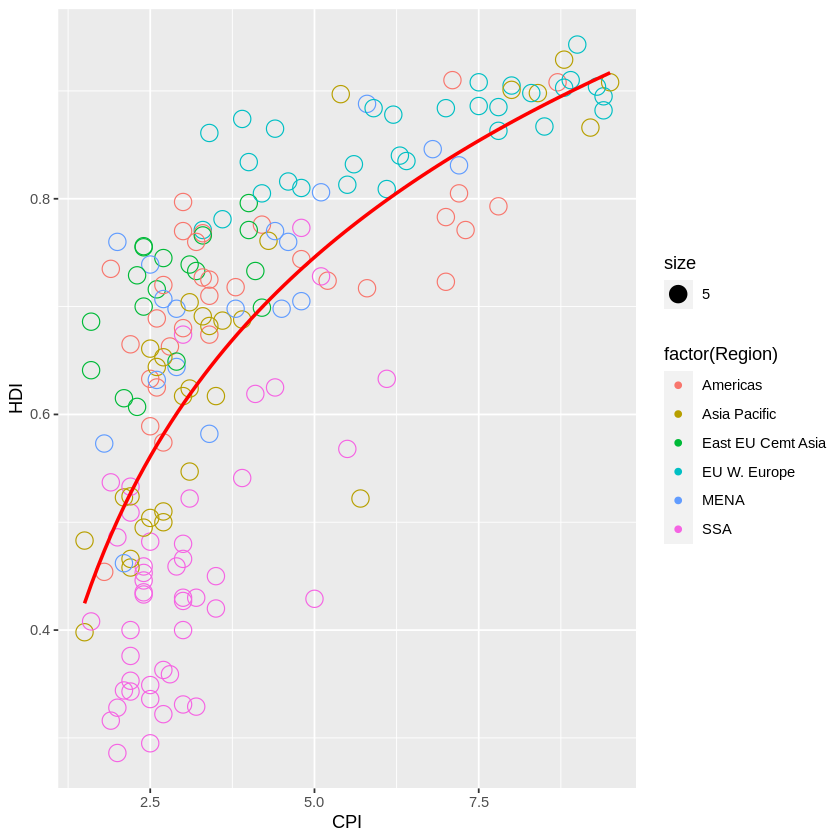

In [40]:
pl4 <- pl2 + geom_smooth(aes(group=1), method='lm', formula=y ~ log(x), se = FALSE, color='red')
print(pl4)

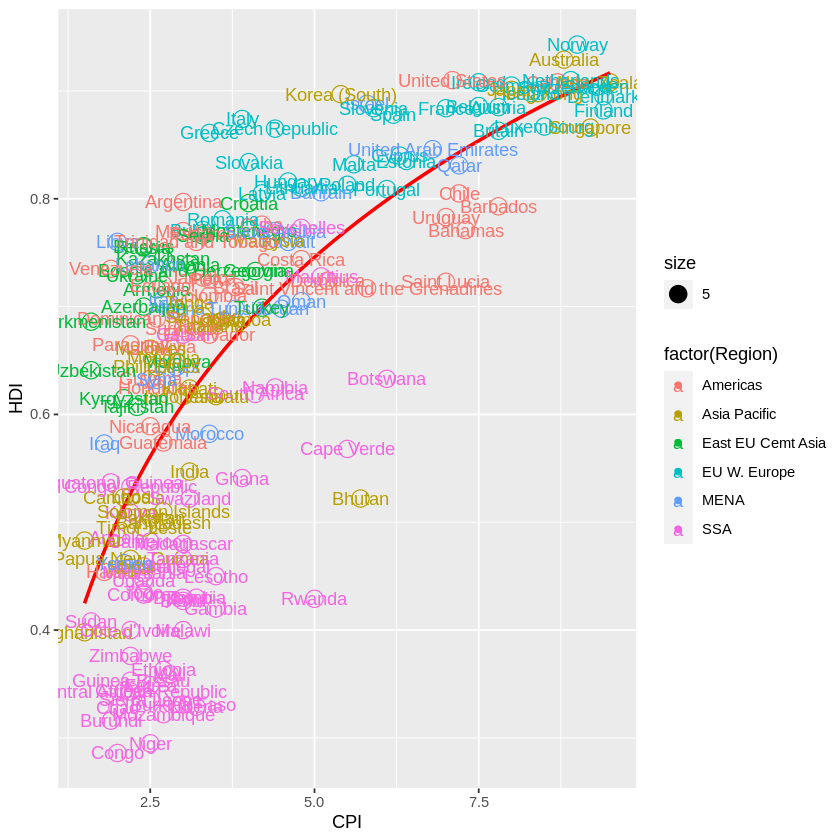

In [41]:
pl5 <- pl4 + geom_text(aes(label=Country))
print(pl5)

subset the label.

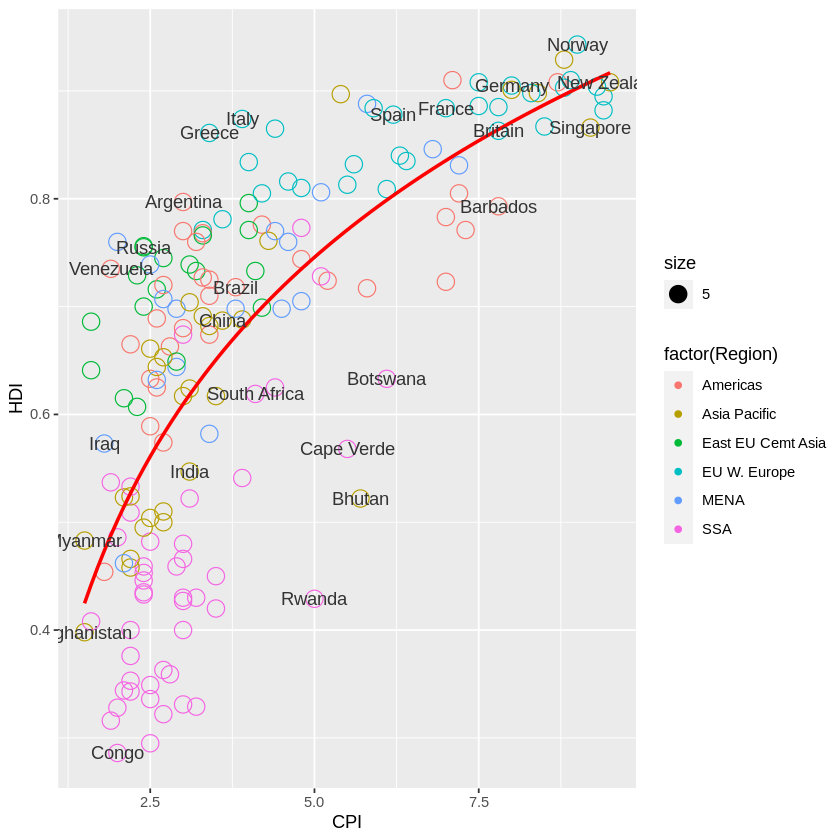

In [42]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan", "Afghanistan", "Congo", "Greece", "Argentina", "Brazil", "India", "Italy", "China", "South Africa", "Spain", "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France", "United States", "Germany", "Britain", "Barbados", "Norway", "Japan", "New Zealand", "Singapore")
pl6 <- pl4 + geom_text(aes(label = Country), color = "gray20", data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)
print(pl6)

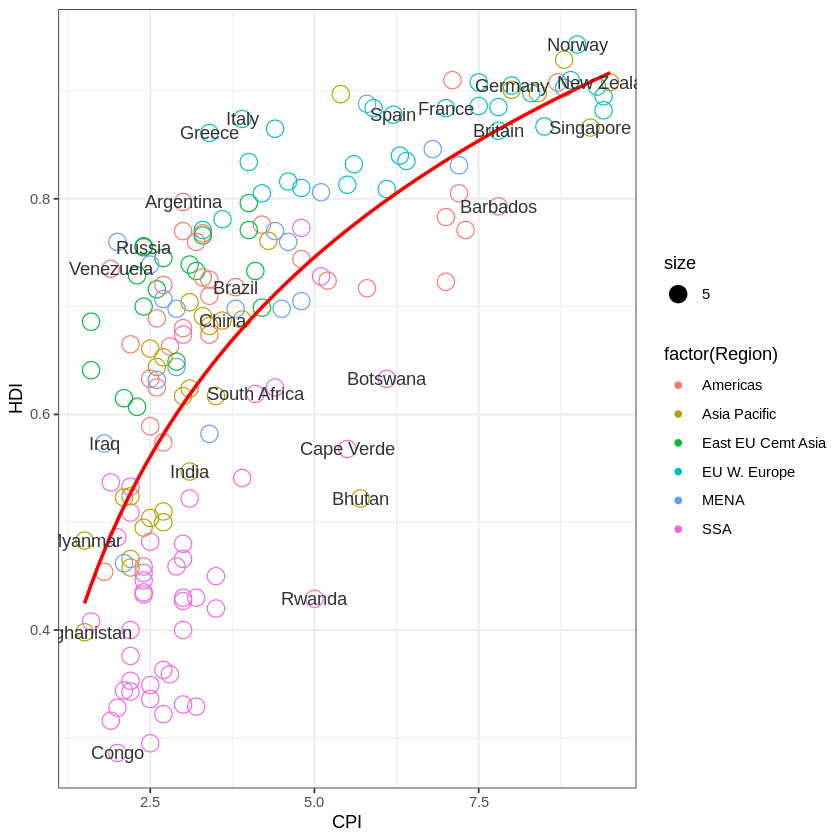

In [43]:
pl7 <- pl6 + theme_bw()
print(pl7)

Add scale_x_continuous() and set the following arguements. [name = *, limits = vector, breaks = 1:10]

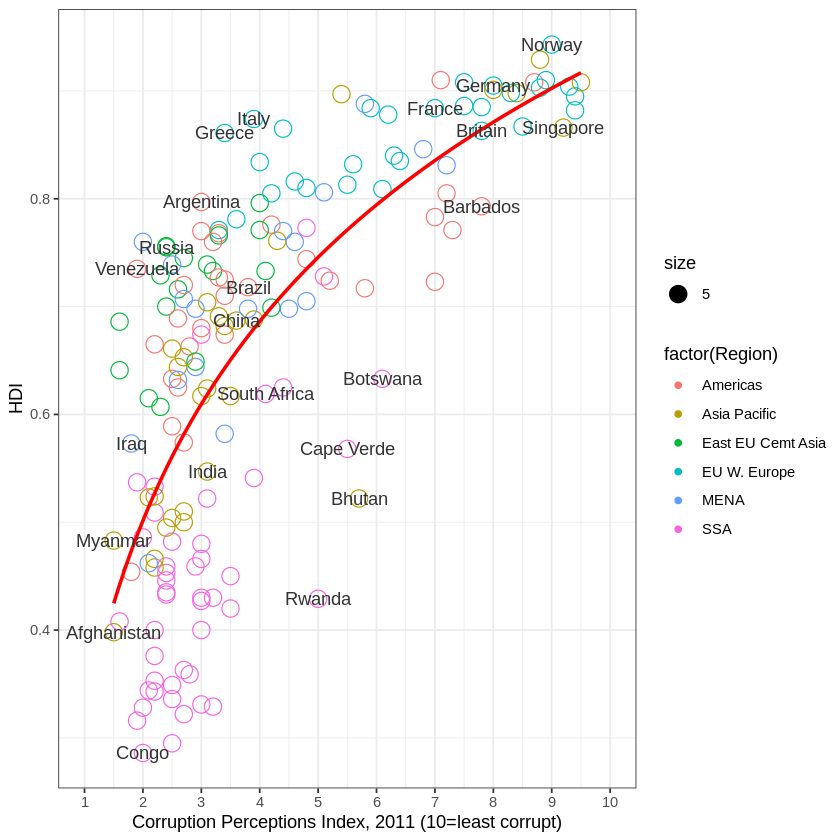

In [50]:
pl8 <- pl7 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)", limits = c(1,10), breaks=1:10)
print(pl8)

Use scale_y_continuous

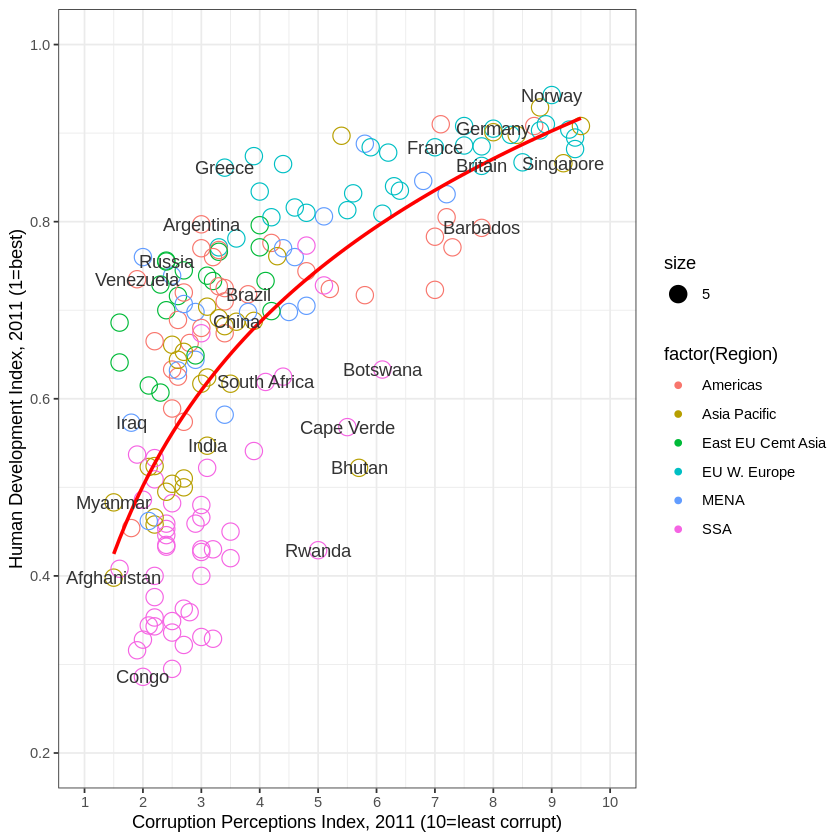

In [52]:
pl9 <- pl8 + scale_y_continuous(name = "Human Development Index, 2011 (1=best)",limits=c(0.2,1.0))
print(pl9)

Add a title.

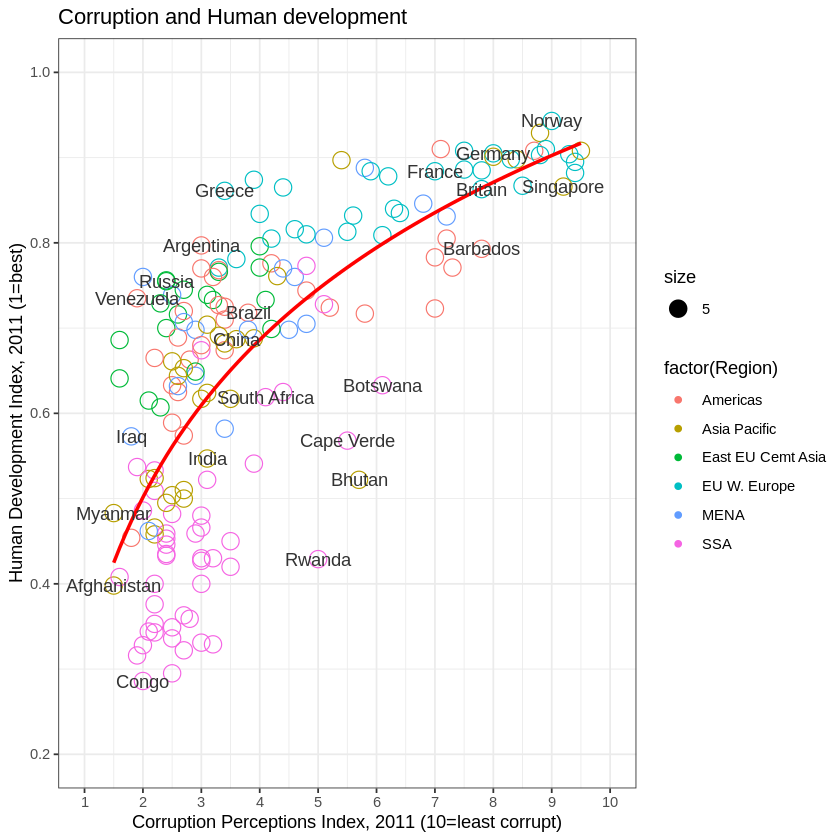

In [54]:
pl10 <- pl9 + ggtitle("Corruption and Human development")
print(pl10)